<a href="https://colab.research.google.com/github/NathoC31/Practicando_Python_para_Data-Science_Challenge_Alura_Store_NathalyCuasapaz/blob/main/AluraStoreLatam_Challenge1_Nathaly_Cuasapaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



#Nathaly Cuasapaz

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
suma = tienda['Precio'].sum()
suma2 = tienda2['Precio'].sum()
suma3 = tienda3['Precio'].sum()
suma4 = tienda4['Precio'].sum()
print(suma)
print(suma2)
print(suma3)
print(suma4)

1150880400.0
1116343500.0
1098019600.0
1038375700.0


In [ ]:
facturacion_tiendas = {
    'Tienda 1': suma,
    'Tienda 2': suma2,
    'Tienda 3': suma3,
    'Tienda 4': suma4
}
mayor_facturacion = 0
tienda_mayor_facturacion = ''
for tienda, facturacion in facturacion_tiendas.items():
  if facturacion > mayor_facturacion:
    mayor_facturacion = facturacion
    tienda_mayor_facturacion = tienda
print(f'La tienda con mayor facturación es {tienda_mayor_facturacion} con una facturación de {mayor_facturacion}')

La tienda con mayor facturación es Tienda 1 con una facturación de 1150880400.0


# 2. Ventas por categoría

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría del producto, contando las ventas
conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Encontrar la categoría más popular por tienda
categoria_mas_popular = conteo_por_tienda_categoria.loc[conteo_por_tienda_categoria.groupby('Tienda')['Cantidad de Ventas'].idxmax()]

print("Cantidad de productos vendidos por categoría en cada tienda:")
print(conteo_por_tienda_categoria)

print("\nCategoría más popular por tienda:")
print(categoria_mas_popular)

Cantidad de productos vendidos por categoría en cada tienda:
      Tienda   Categoría del Producto  Cantidad de Ventas
0   Tienda 1  Artículos para el hogar                 171
1   Tienda 1     Deportes y diversión                 284
2   Tienda 1        Electrodomésticos                 312
3   Tienda 1             Electrónicos                 448
4   Tienda 1   Instrumentos musicales                 182
5   Tienda 1                 Juguetes                 324
6   Tienda 1                   Libros                 173
7   Tienda 1                  Muebles                 465
8   Tienda 2  Artículos para el hogar                 181
9   Tienda 2     Deportes y diversión                 275
10  Tienda 2        Electrodomésticos                 305
11  Tienda 2             Electrónicos                 422
12  Tienda 2   Instrumentos musicales                 224
13  Tienda 2                 Juguetes                 313
14  Tienda 2                   Libros                 197
15  Tienda 

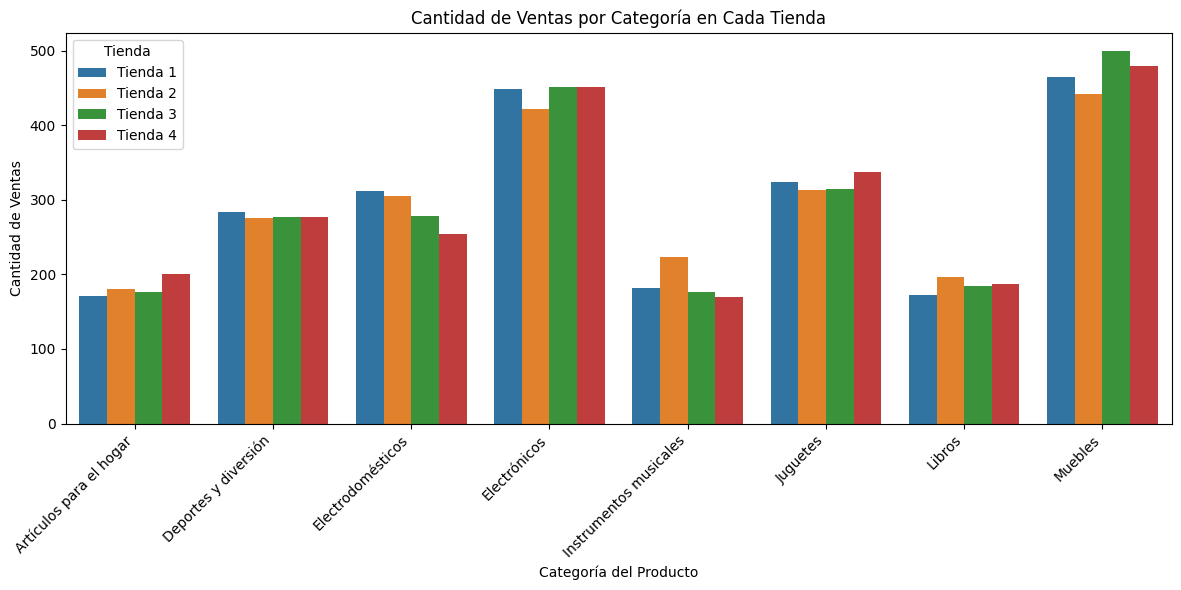

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría del producto, contando las ventas
conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Generar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoría del Producto', y='Cantidad de Ventas', hue='Tienda', data=conteo_por_tienda_categoria)
plt.title('Cantidad de Ventas por Categoría en Cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
import pandas as pd

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular la calificación promedio por tienda
calificacion_promedio_por_tienda = ventas_totales.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')

print("Calificación promedio de los clientes por tienda:")
print(calificacion_promedio_por_tienda)

Calificación promedio de los clientes por tienda:
     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


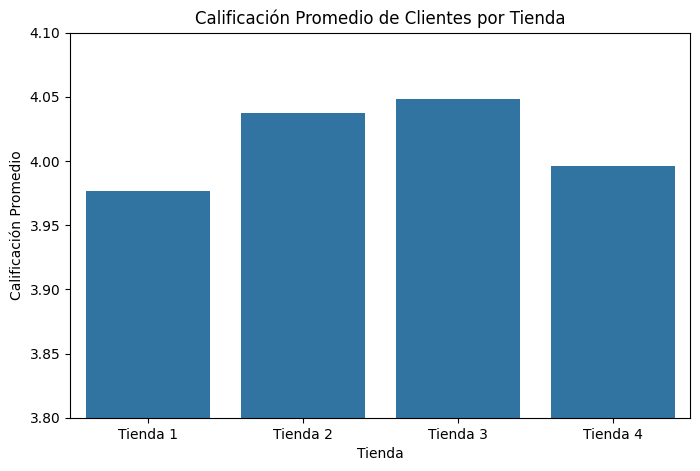

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Tienda', y='Calificación Promedio', data=calificacion_promedio_por_tienda)
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(3.8, 4.1) # Ajusta los límites del eje y para mejor visualización de las pequeñas diferencias
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Contar la cantidad de ventas por producto en cada tienda
conteo_ventas_producto_tienda = ventas_totales.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# Encontrar el producto más vendido y menos vendido en cada tienda
producto_mas_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmax()]
producto_menos_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmin()]

print("Producto más vendido por tienda:")
print(producto_mas_vendido)

print("\nProducto menos vendido por tienda:")
print(producto_menos_vendido)

Producto más vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
1    Tienda 1                    Armario                  60
75   Tienda 2  Iniciando en programación                  65
129  Tienda 3              Kit de bancas                  57
163  Tienda 4                   Cama box                  62

Producto menos vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
4    Tienda 1  Auriculares con micrófono                  33
77   Tienda 2              Juego de mesa                  32
111  Tienda 3    Bloques de construcción                  35
175  Tienda 4         Guitarra eléctrica                  33


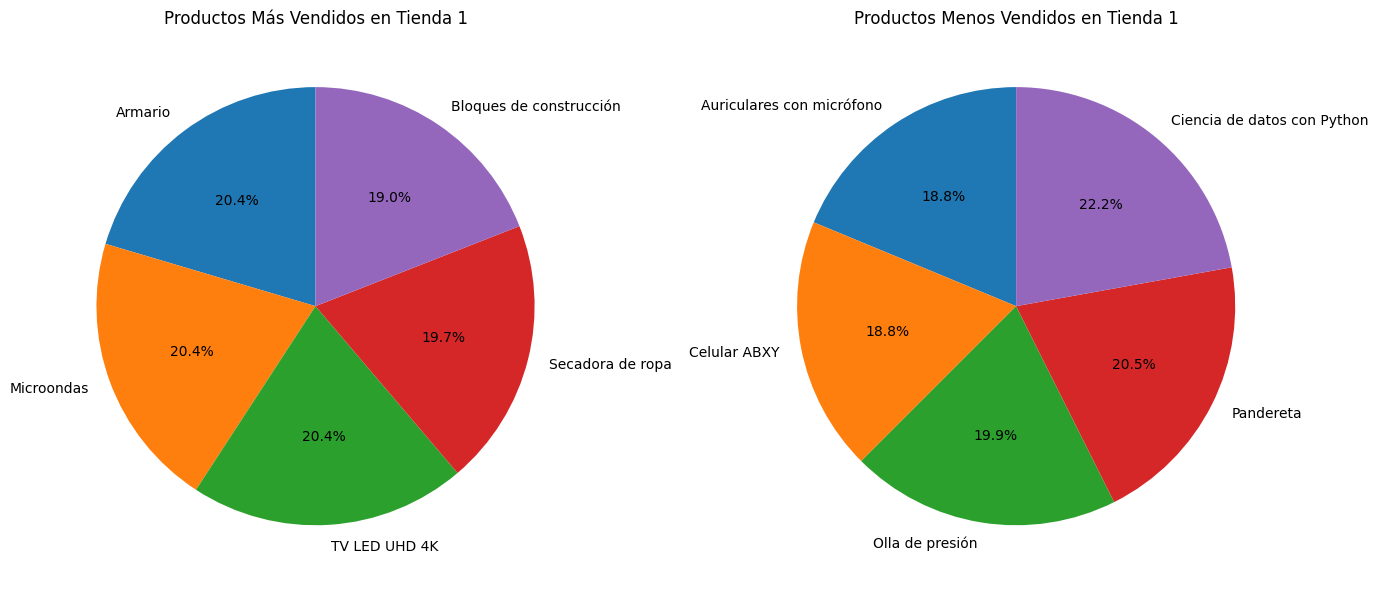

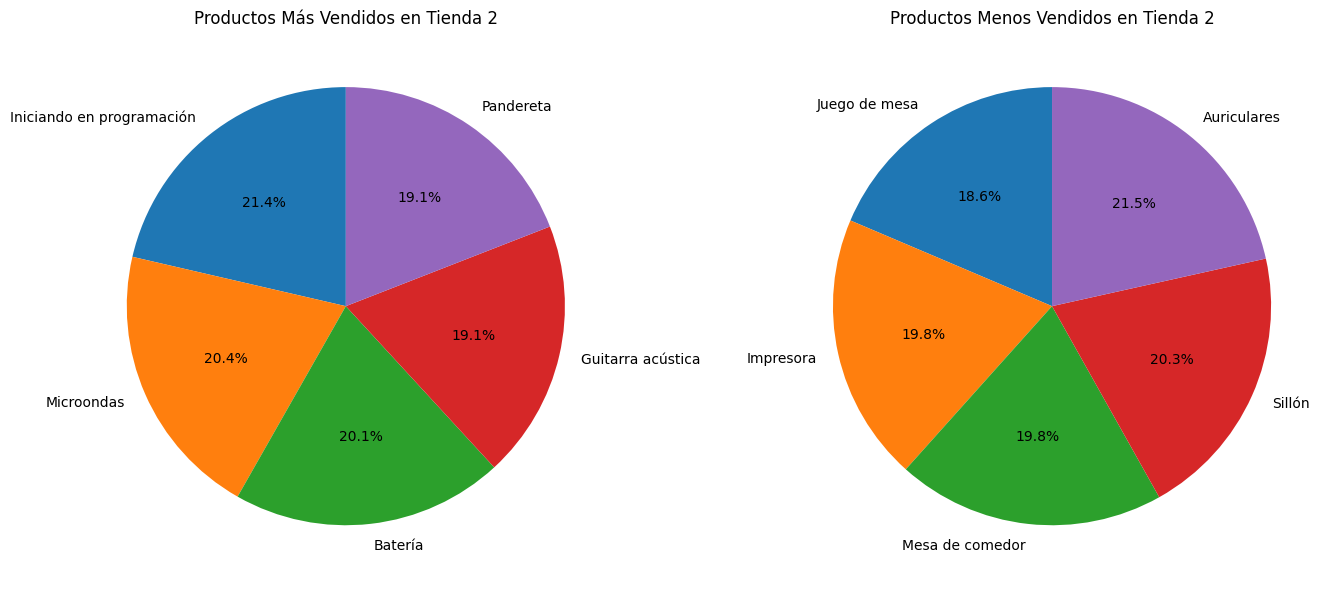

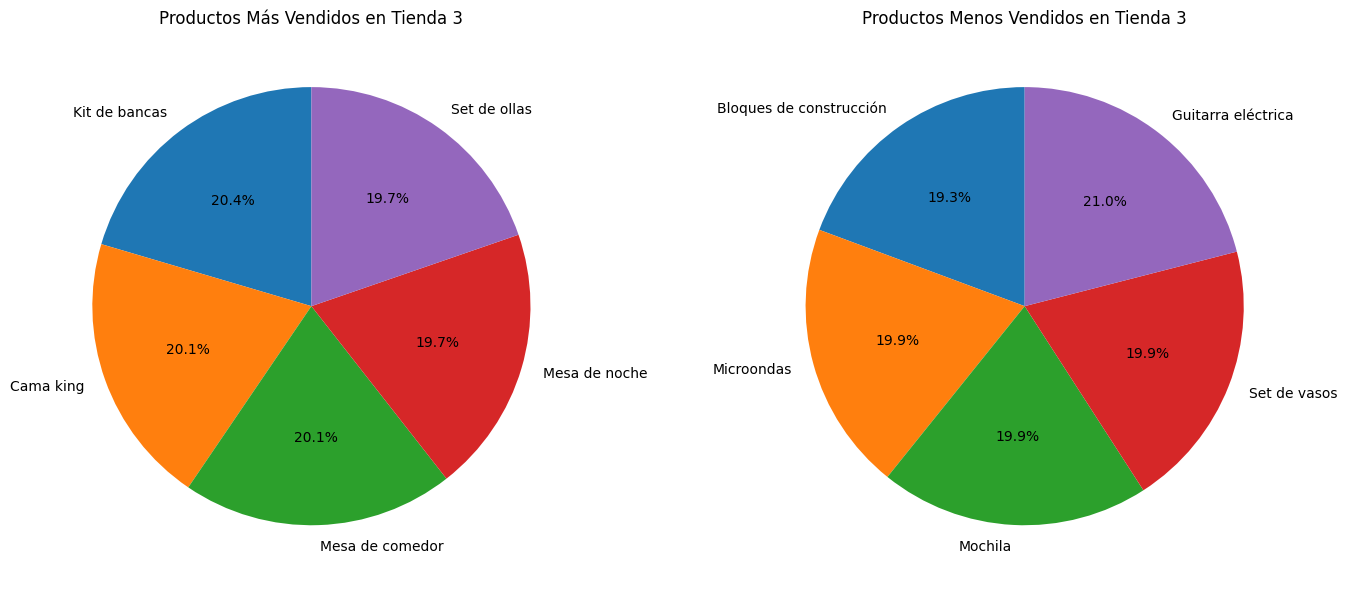

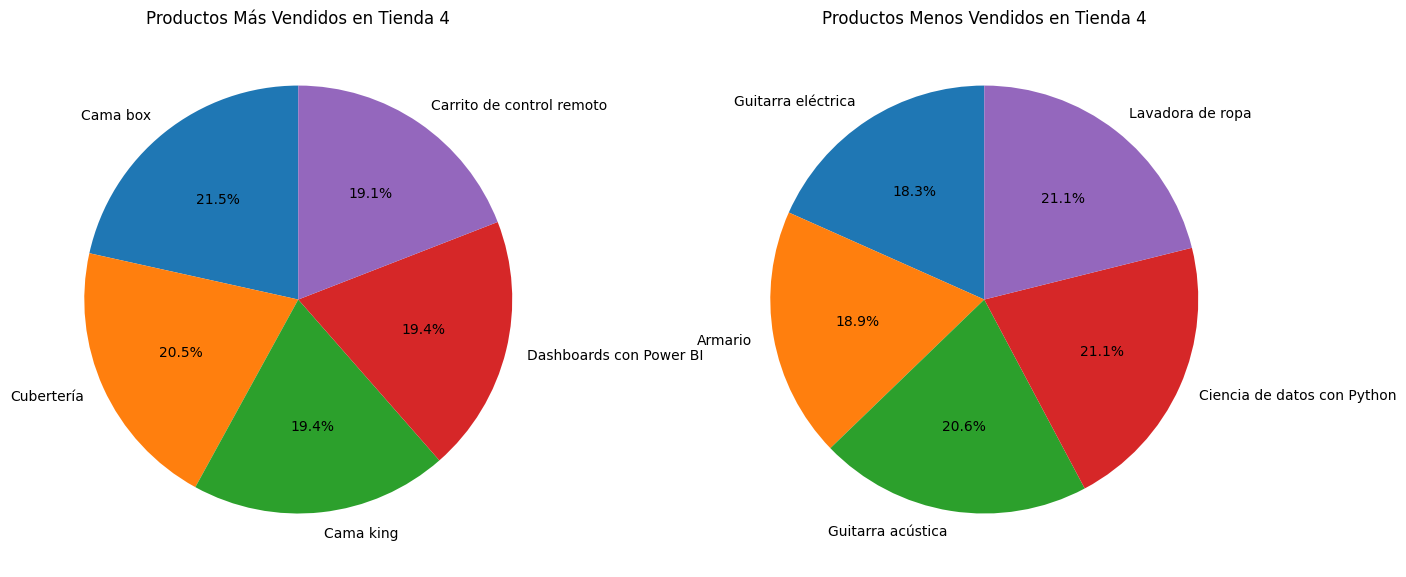

In [ ]:
import matplotlib.pyplot as plt
# Función para crear gráficos de pastel para cada tienda
def plot_pie_charts_for_store(data, store_name):
    plt.figure(figsize=(14, 6))

    # Datos para la tienda actual
    store_data = data[data['Tienda'] == store_name]

    # Productos más vendidos
    top_products = store_data.nlargest(5, 'Cantidad de Ventas') # Seleccionar top 5 productos

    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
    plt.pie(top_products['Cantidad de Ventas'], labels=top_products['Producto'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Productos Más Vendidos en {store_name}')

    # Productos menos vendidos
    # Para evitar muchos productos con 1 venta, podemos filtrar productos con más de 1 venta y luego tomar los menos vendidos
    # O simplemente tomar los 5 menos vendidos, que puede incluir muchos productos con 1 venta
    # Vamos a tomar los 5 menos vendidos para simplicidad, asumiendo que hay suficientes productos
    bottom_products = store_data.nsmallest(5, 'Cantidad de Ventas')

    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
    plt.pie(bottom_products['Cantidad de Ventas'], labels=bottom_products['Producto'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Productos Menos Vendidos en {store_name}')

    plt.tight_layout()
    plt.show()

# Generar gráficos para cada tienda
for store_name in ventas_totales['Tienda'].unique():
    plot_pie_charts_for_store(conteo_ventas_producto_tienda, store_name)

# 5. Envío promedio por tienda

In [ ]:
# Calcular el costo de envío promedio por tienda
costo_envio_promedio_por_tienda = ventas_totales.groupby('Tienda')['Costo de envío'].mean().reset_index(name='Costo de Envío Promedio')

print("Costo de envío promedio por tienda:")
print(costo_envio_promedio_por_tienda)

Costo de envío promedio por tienda:
     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


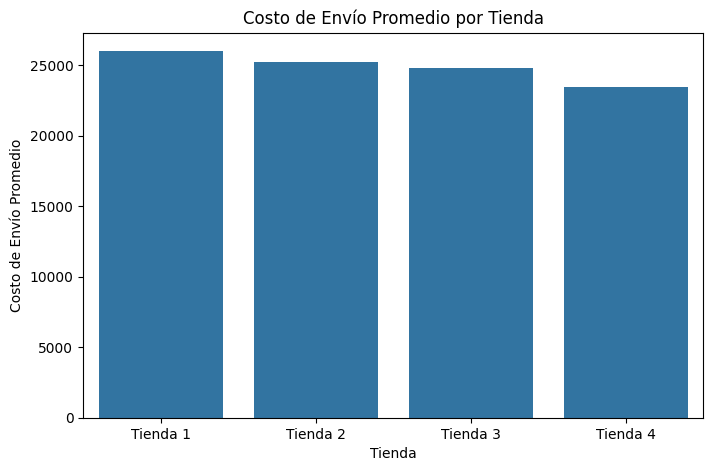

In [ ]:
import matplotlib.pyplot as plt
# Generar el gráfico de barras para el costo de envío promedio
plt.figure(figsize=(8, 5))
sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=costo_envio_promedio_por_tienda)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()

#Informe final

#Introducción
El señor Juan tiene 4 tiendas y quiere hacer un anális de los datos disponibles en cuatro archivos, con informacion de sus cuatro tiendas, para decidir cual vender.

Se procedará a extraer datos de los mencionados archivos, para generar tablas y graficos y de sea manaera poder justificar la decisión.